In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
UVC = pd.read_csv("Universities.csv")
UVC.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
UVC.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000


In [11]:
# data preparation for analysis

def norm_func(i):
    x= (i-i.mean())/(i.std())
    return(x)

In [12]:
df_norm = norm_func(UVC.iloc[:,1:])
df_norm.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.401994,0.644235,-0.871888,0.068841,-0.324717,0.803729
1,1.370988,1.210256,-0.719814,-1.652182,2.508651,-0.631501
2,-0.059432,-0.745090,1.003685,-0.914600,-0.163745,-1.625123
3,0.401994,-0.024699,-0.770506,-0.177019,0.285756,0.141315
4,0.125139,0.335496,-0.314285,0.068841,-0.382949,0.362120


In [13]:
df_norm.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,2.500000e+01
mean,-4.796163e-16,-2.131628e-16,-1.332268e-16,-1.754152e-16,0.000000,9.769963e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-2.412704e+00,-2.494609e+00,-1.277417e+00,-1.652182e+00,-1.295262,-2.177135e+00
25%,-2.440020e-01,-1.276120e-01,-7.705055e-01,-4.228798e-01,-0.849088,-6.315015e-01
50%,1.712813e-01,2.325832e-01,-1.622117e-01,-1.770194e-01,0.011439,3.621197e-01
75%,6.788497e-01,6.956914e-01,5.474645e-01,3.147012e-01,0.518687,8.037292e-01
max,1.370988e+00,1.210256e+00,2.575111e+00,3.019165e+00,2.508651,1.134936e+00


In [14]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

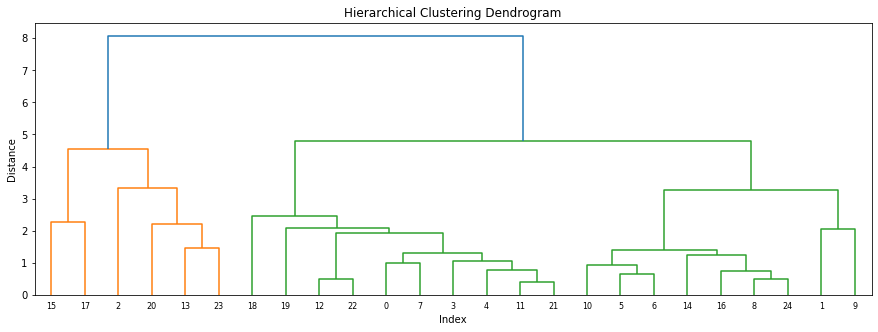

In [16]:
help(linkage)
z = linkage(df_norm, method="complete",metric='euclidean')
plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
              leaf_rotation=0.,
              leaf_font_size=8.,
              )
plt.show()

In [17]:
# Now applying Agglomerative Clustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import AgglomerativeClustering

In [18]:
h_complete = AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(df_norm)
h_complete.labels_

cluster_labels=pd.Series(h_complete.labels_)

In [20]:
UVC['clust']=cluster_labels
UVC= UVC.iloc[:,[7,0,1,2,3,4,5,6]]
UVC.head()

,clust,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,2,Brown,1310,89,22,13,22704,94
1,1,CalTech,1415,100,25,6,63575,81
2,0,CMU,1260,62,59,9,25026,72
3,2,Columbia,1310,76,24,12,31510,88
4,2,Cornell,1280,83,33,13,21864,90


In [21]:
UVC.groupby(UVC.clust).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
clust,,,,,,
0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000


In [22]:
UVC.to_csv("Universities.csv",index=False)